In [2]:
%pylab inline
import pandas as pd
import numpy as np
from datetime import datetime
from os.path import join
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
from ipywidgets import interact,interact_manual,IntSlider,FloatSlider

In [4]:
%run customTypes
%run thermocouple
%run pfeiffer
%run ionizationGauge

In [5]:
desk = join(os.path.expanduser("~"),"Desktop", "Data")
drop = join(os.path.expanduser("~"),"Dropbox", "workspace","data")
# drop = join(os.path.expanduser("~"),"Dropbox", "Experiments","2019-Ito-kun","Data")
drop = join(os.path.expanduser('~'), "Dropbox", "Data")

In [86]:
dr = drop
temp_dir = os.path.join(dr, "Temperature")
pres1_dir = os.path.join(dr, "Pressure1")
pres2_dir = os.path.join(dr, "Pressure2")
qms_dir = os.path.join(dr, "Qms")

In [87]:
%run notebooktools.py

In [88]:
lst = [i for i in sorted(os.listdir(temp_dir)) if i.startswith('out')]
sz = np.array([os.path.getsize(join(temp_dir,i)) for i in lst])
ind = list(np.where(sz>150)[0])
lst = [lst[i] for i in ind]

lsq = [i for i in sorted(os.listdir(qms_dir)) if i.endswith('CSV')]

In [9]:
""" smoothing savitzky_golay """
# https://plot.ly/python/smoothing/
def savitzky_golay(y, window_size, order):
    ''' smoothing '''
    import numpy as np
    from math import factorial
    from scipy.signal import savgol_filter
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        window_size += 1
    return savgol_filter(y,window_size,order)

In [10]:
## baking plot


In [20]:
fname = lst[-8]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

fname

'out_20191227202138.csv'

(8915, 3)
(7420, 3)
(9093, 3)
(8373, 3)


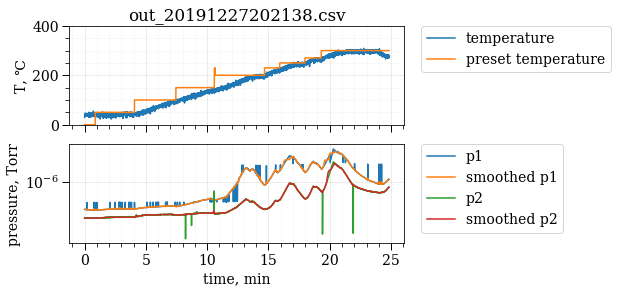

In [21]:
%run notebooktools.py
font_setup(size=14)
""" temperature """
mask = np.where(t_data[:,0] <= 1490)
t_data = t_data[mask]
t_data = maskTemp(t_data)

""" pressure1 """
mask = np.where(p1_data[:,0] <= 1490)
p1_data = p1_data[mask]
p1_data = maskIonPres(p1_data)
print(p1_data.shape)
p1_data[:, 1] = np.where(p1_data[:, 0] >= 755, p1_data[:, 1]*1e-6, p1_data[:, 1]*1e-7)
mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
p1_data = p1_data[mask]
print(p1_data.shape)

""" pressure2 """
mask = np.where(p2_data[:,0] <= 1490)
p2_data = p2_data[mask]
print(p2_data.shape)
p2_data = maskPfePres(p2_data)
mask = np.where((abs(np.gradient(p2_data[:, 1])) < 5e-9) & (p2_data[:, 1] < 1e-5) & ((p2_data[:, 0] < 800) & (p2_data[:, 1] < 1e-6) | (p2_data[:, 0] >= 800)))
p2_data = p2_data[mask]
print(p2_data.shape)

plt.subplot(2, 1, 1)
plt.plot(t_data[:, 0]/60, t_data[:, 1], label='temperature')
plt.plot(t_data[:, 0]/60, t_data[:, 2], label='preset temperature')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0, 400])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title(fname)

plt.subplot(2, 1, 2)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='p1')
p1_data[:, 1] = savitzky_golay(p1_data[:, 1], 20, 1)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='smoothed p1')

plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='p2')
p2_data[:, 1] = savitzky_golay(p2_data[:, 1], 20, 1)
plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='smoothed p2')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('pressure, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

In [32]:
fname = lst[-2]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
print(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)


""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

fname

/Users/itotatsuhiko/Dropbox/Data/Temperature/out_20200110_115734.csv


'out_20200110_115734.csv'

(60978, 3)
(60978, 3)


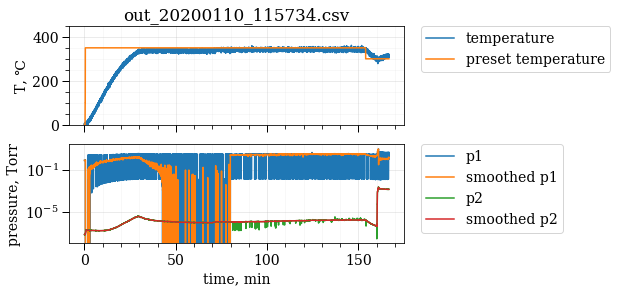

In [33]:
%run notebooktools.py
font_setup(size=14)

fr = 0
to = 10000

""" temperature """
mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_data = t_data[mask]
t_data = maskTemp(t_data)
# t_data[:, 1] += 20.9

""" pressure1 """
mask = np.where((p1_data[:,0] <= to) & (p1_data[:, 0] >= fr))
p1_data = p1_data[mask]
# p1_data = maskIonPres(p1_data)
print(p1_data.shape)
# p1_data[:, 1] = np.where(p1_data[:, 0] >= 2465, p1_data[:, 1]*1e-7, p1_data[:, 1]*1e-7) # TODO: log scale の計算

# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]
print(p1_data.shape)

""" pressure2 """
mask = np.where((p2_data[:,0] <= to) & (p2_data[:, 0] >= fr))
p2_data = p2_data[mask]
p2_data = maskPfePres(p2_data)

plt.subplot(2, 1, 1)
plt.plot(t_data[:, 0]/60, t_data[:, 1], label='temperature')
plt.plot(t_data[:, 0]/60, t_data[:, 2], label='preset temperature')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0,450])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title(fname)

plt.subplot(2, 1, 2)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='p1')
p1_data[:, 1] = savitzky_golay(p1_data[:, 1], 20, 1)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='smoothed p1')

plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='p2')
p2_data[:, 1] = savitzky_golay(p2_data[:, 1], 20, 1)
plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='smoothed p2')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('pressure, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

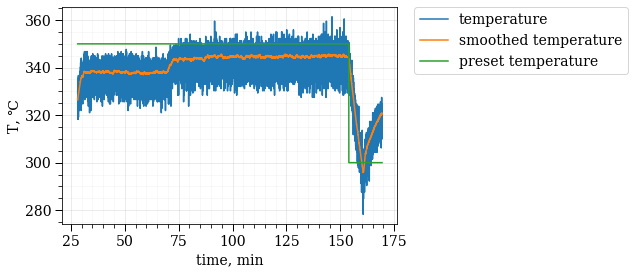

In [30]:
fr = 10000
to = 60000

t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)
t_data = maskTemp(t_data)

plt.plot(t_data[fr:to, 0]/60, t_data[fr:to, 1], label='temperature')
t_data[:, 1] = savitzky_golay(t_data[:, 1], 200, 1)
plt.plot(t_data[fr:to, 0]/60, t_data[fr:to, 1], label='smoothed temperature')
plt.plot(t_data[fr:to, 0]/60, t_data[fr:to, 2], label='preset temperature')

ticks_visual(gca())
grid_visual(gca())
plt.ylabel('T, ℃')
plt.xlabel('time, min')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

In [16]:
## plasma plot


In [108]:
fname = lst[-8]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

""" qms """
base_time = datetime(2019, 12, 27, 20, 21, 38)
start_time = datetime(2019, 12, 27, 20, 17, 24)
d_time = (start_time - base_time).total_seconds()

q_data = pd.read_csv(join(os.path.expanduser("~"), "Desktop", "Data", "Qms", lsq[2]), header=36, encoding='utf-8')

columns = q_data.columns
q_data = np.array(q_data)

columns

Index(['測定回数', '経過時間   ', 'アナログ１', 'アナログ２', '全圧   ', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20'],
      dtype='object')

In [109]:
""" calculate time """
def calc_time(time: str):
    hour, minute, second = time.split(':')
    tmp = int(hour)*60*60 + int(minute)*60 + float(second)
    return tmp + d_time


(1841, 3)
(1841, 3)
(1843, 3)
(1821, 3)

    gas : 25.616666666666667,
    cathode on: 26.966666666666665,
    vgclose: 27.433333333333334,
    plasma on: 27.816666666666666,
    plasma off: 29.933333333333334



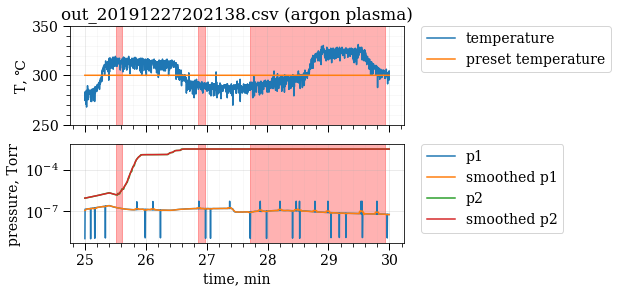

In [110]:
%run notebooktools.py
font_setup(size=14)

fr = 1500
to = 1800

""" temperature """
mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_data = t_data[mask]
t_data = maskTemp(t_data)

""" pressure1 """
mask = np.where((p1_data[:,0] <= to) & (p1_data[:, 0] >= fr))
p1_data = p1_data[mask]
# p1_data = maskIonPres(p1_data)
print(p1_data.shape)
p1_data[:, 1] = np.where(p1_data[:, 0] >= 2465, p1_data[:, 1]*1e-7, p1_data[:, 1]*1e-7) # TODO: log scale の計算

# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]
print(p1_data.shape)

""" pressure2 """
mask = np.where((p2_data[:,0] <= to) & (p2_data[:, 0] >= fr))
p2_data = p2_data[mask]
print(p2_data.shape)
p2_data = maskPfePres(p2_data)
print(p2_data.shape)

""" qms """

plt.subplot(2, 1, 1)
plt.plot(t_data[:, 0]/60, t_data[:, 1], label='temperature')
plt.plot(t_data[:, 0]/60, t_data[:, 2], label='preset temperature')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([250,350])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.axvspan((1537/60)-0.1, 1537/60, color="red", alpha=0.3)
plt.axvspan((1618/60)-0.1, 1618/60, color="red", alpha=0.3)
plt.axvspan((1669/60)-0.1, 1796/60, color="red", alpha=0.3)
plt.title(fname+" (argon plasma)")

plt.subplot(2, 1, 2)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='p1')
p1_data[:, 1] = savitzky_golay(p1_data[:, 1], 20, 1)
plt.plot(p1_data[:, 0]/60, p1_data[:, 1], label='smoothed p1')

plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='p2')
p2_data[:, 1] = savitzky_golay(p2_data[:, 1], 20, 1)
plt.plot(p2_data[:, 0]/60, p2_data[:, 1], label='smoothed p2')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('pressure, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

print("""
    gas : {},
    cathode on: {},
    vgclose: {},
    plasma on: {},
    plasma off: {}
""".format(1537/60, 1618/60, 1646/60, 1669/60, 1796/60)) 
plt.axvspan((1537/60)-0.1, 1537/60, color="red", alpha=0.3)
plt.axvspan((1618/60)-0.1, 1618/60, color="red", alpha=0.3)
plt.axvspan((1669/60)-0.1, 1796/60, color="red", alpha=0.3)